# Integración numérica

Integrar, al contrario de derivar, no es una operación *algorítmica*, es decir, no existe una manera de, dada una función, calcular su integral definida en un intervalo. 

Debido a esto, integrar analíticamente es mucho más dificil que derivar analíticamente. Más aún, existen funciones cuyas integrales, aunque existan, no se pueden expresar de manera simple.

Para atacar todos estos problemas, en análisis numérico se han desarrollado distintos métodos para calcular la integral de una función.


## Planteamiento del problema

Dada una función $f:[a,b] \to \mathbb{R}$ continua a pedazos (tiene a lo más un número numerable de discontinuidades), quiero calcular $\int_{a}^{b} f(s) ds$, que corresponde al área algebraica entre la función y el eje x

![](https://lh3.googleusercontent.com/KiLWWFTJW6EF3SNuzVS9nAmbA1xlwvPfZbfy0sTweVdrqlTsrpBP6rYzYVIGYMKAmVQ1_CouwBu0hR4rIaR467hmYXvDfSGD39wgcrLv0cwnPoMizRnEuNNcU2Dks3RKNbHBLjROyA=w400)

## ¿Cómo calculo una integral numéricamente?

Primero debemos recordar la definición de una integral sobre el intervalo $[a,b]$. 

### Particiones regulares
Sea $P = \{x_0=a, x_1, \ldots, x_{n-1}, x_n = b\}$. Decimos que $P$ es una **partición regular** de $[a,b]$ si y solo si, para toda $i$ se cumple que

1. $x_{i} < x_{i+1}$ 

2.  $x_{i+1} - x_{i} = h = \frac{b-a}{n}$

En este ejemplo, la partición tiene $n+1$ puntos y $n$ subintervalos

### Sumas de Riemann

Primero la integral se aproxima mediante la suma de las áreas de varios rectángulos cuyas bases están sobre una partición regular del invervalo $[a,b]$

$$
\int_{a}^{b} f(s) ds \approx \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$. Notemos que la altura del rectángulo, dada por $f(\xi_i)$, es arbitraria. Para tener la integral, simplemente tomamos el límite cuando el número de puntos de la partición tiende a infinito:

$$
\int_{a}^{b} f(s) ds = \lim_{n \to \infty} \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = \lim_{n \to \infty} h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$


![](https://lh3.googleusercontent.com/-W_1UtNF8I6txqirGvNCW_aQI5lYB6vHOnAt9F1Pg7QSj8uUqaZPLwiAIUc-nxysR3x8hcNK-Kx8Mpn-M2OeqXJW5HZiv0skhmw0Hh67N3m5yCEZ5-IdC_nQngwprbDydmiue3d0EA=w400)


### Sumas importantes

Si f es continua, sabemos que en cualquier intervalo cerrado alcanza su máximo y su mínimo. Así, podemos tomar como alturas de los rectángulos los valores máximos y mínimos de la función y así obtener:

#### Suma superior:

$\xi_i = \text{argmax}_{x\in[x_{i-1},x_i]}{f(x)}$, $f(\xi_i) = \max_{x \in [x_{i-1},x_i]}{f(x)}$

#### Suma inferior:

$\xi_i = \text{argmin}_{x\in[x_{i-1},x_i]}{f(x)}$, $f(\xi_i) = \min_{x \in [x_{i-1},x_i]}{f(x)}$

## ¿Podemos implementar una suma superior o inferior en la computadora? 

Generalmente **NO**: como ya vimos, encontrar minimos y maximos no es sencillo y eso se tendría que hacer para cada subintervalo de la partición ($n$ veces), lo que haría la integración muy tardada.

## ¿Cómo calculamos entonces la integral? 

Ya que no podemos hacer sumas superiores o inferiores, lo más sencillo es tomar $\xi_i$ de manera que sea fácil calcular la integral en la computadora:

Recordamos que $\xi_i \in [x_{i-1},x_i]$

### Primera opción: $\xi_i = x_{i}$ (Integral rectangular hacia adelante)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_i)
$$

Tomar el punto $\xi_i = x_{i}$ corresponde a aproximar la integral como se muestra en la siguiente figura

![adelante](https://lh3.googleusercontent.com/DSVcg_tdtBMPUSoZ8csX9KRJBW6Id75H1kRuWhi20JaepmXy2sqUUcVLI1cB_2dnhTYMmr0Wo-W6vw00tN7vXFbzrk9fszmnx-KAg7rpZ348woEIfybr-gy_0eS4jCb7RYVoQR9JyA=w300)



## Preludio computacional: diferencia entre los indices de la partición y de la lista de Julia

Muchas veces, cuando planteamos un problema de manera matemática, la notación del problema puede incluir índices que nosotros también quisiéramos utilizar. Sin embargo, es importante recordar que **los índices en un objeto iterable siempre empiezan en 1**. Para el caso de la partición, se cumple que:


Partición: $xs = \{x_0, x_1, x_2 \ldots, x_{n-1},x_n\}$

Si queremos representar todos los puntos de la partición en un arreglo, debemos notar que tendrán la siguiente correspondencia

$xs[1] = x_0$

$xs[2] = x_1$

.
.
.

$xs[i] = x_{i-1}$

$xs[i+1] = x_{i}$

Es fundamental que dicha correspondencia se respete para no tener problemas entre lo teórico y lo computacional

In [1]:
function intAdelante(f,a,b,n)
    # hacer la particion regular con n+1 puntos, es decir, n subintervalos
    xs = range(a,stop = b, length = n+1)
    # hacer la suma de Riemann
    integral = 0
    for i in range(1,stop=n)
        # xs[i+1] es el x_i de la partición
        integral = integral + f(xs[i+1])
    end
    # multiplicamos por h = (b-a)/n
    integral = (b-a)/n * integral
    return integral
end

intAdelante (generic function with 1 method)

Podemos probar nuestra implementación en la función $f(x) = 3x^2$

Analíticamente, sabemos que

$$
\int_0^2 3x^2 dx= x^3 \mid_0^2 = 2^3 - 0^3 = 8
$$

In [2]:
function prueba(x)
    return 3*x^2
end

prueba (generic function with 1 method)

In [3]:
# con 10 subintervalos, o rectángulos, la aproximación es mala
println(intAdelante(prueba,0,2,10))
# tomando más mejora 
println(intAdelante(prueba,0,2,100))
println(intAdelante(prueba,0,2,1000))

9.24
8.120399999999998
8.012004000000006


In [4]:
using Plots

exponentes: 
[1.0, 1.103448275862069, 1.206896551724138, 1.3103448275862069, 1.4137931034482758, 1.5172413793103448, 1.6206896551724137, 1.7241379310344827, 1.8275862068965518, 1.9310344827586208, 2.0344827586206895, 2.1379310344827585, 2.2413793103448274, 2.3448275862068964, 2.4482758620689653, 2.5517241379310347, 2.6551724137931036, 2.7586206896551726, 2.8620689655172415, 2.9655172413793105, 3.0689655172413794, 3.1724137931034484, 3.2758620689655173, 3.3793103448275863, 3.4827586206896552, 3.586206896551724, 3.689655172413793, 3.793103448275862, 3.896551724137931, 4.0]
numeros de  subintervalos: 
[10, 13, 17, 21, 26, 33, 42, 53, 68, 86, 109, 138, 175, 222, 281, 357, 453, 574, 728, 924, 1173, 1488, 1888, 2396, 3040, 3857, 4894, 6211, 7881, 10000]


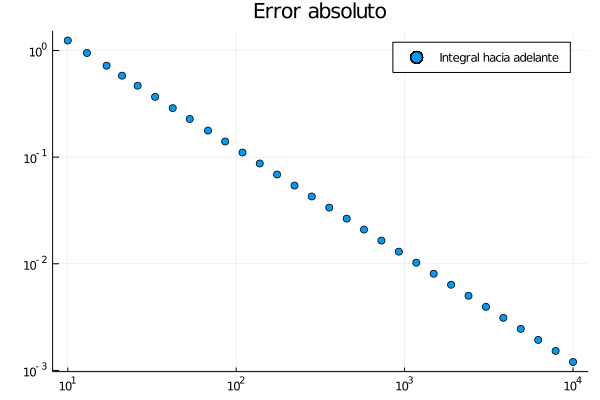

In [5]:
# seleccionamos ns espaciadas logaritmicamente
# aux guarda los exponentes de las ns
aux = range(1,stop=4,length=30)
println("exponentes: ")
println(collect(aux))
# ns va a guardar mis ns (los distintos numeros de subintervalos)
# todos los elementos de n deben ser enteros, por lo que debemos redondearlos hacia arriba con la función
# ceil (función techo) y luego convertirlos a enteros con la función Int64()
ns = [Int64(ceil(10^k)) for k in aux]
println("numeros de  subintervalos: ")
println(collect(ns))
ys = [abs(intAdelante(prueba,0,2,n)-8) for n in ns]
scatter(ns,ys,title="Error absoluto",label="Integral hacia adelante",xscale=:log10,yscale=:log10)

## Ejercicio 1

Resuelve las siguientes dos integrales utilizando la regla de integración hacia adelante:

1. $$\int_{0}^{1} \frac{\arctan{\sqrt{x^2+2}}}{\left(\sqrt{x^2+2}\right)(x^2+1)} \; dx = \frac{5\pi^2}{96}$$



2. $$\int_{0}^{\pi} \ln{\left(1 - 2 e \cos{x}+ e^2 \right) } \; dx = 2\pi$$

$e$ es el número de Euler.

Usando el resultado que se muestra, grafica el error absoluto como función del número de puntos de la partición $n$ y discute cuál es la tasa de convergencia del método al valor analítico.

## Preludio matemático: integrales como funciones

Aunque sabemos que la integral de una función es un número real, podemos definir una función a partir de una integral de la siguiente forma:

$$
F(x) = \int_{a}^{x} f(s) \; ds
$$

Así, podemos utilizar nuestra función para integrar numéricamente también para construir una función cuya definición esté dada por una integral. Por ejemplo:

$$
\ln{x} = \int_{1}^x \frac{1}{s} \; ds
$$

In [6]:
# definimos una función auxiliar para nuestro logaritmo integrado numéricamente
function inv(s)
    return 1/s
end
# calculamos el logaritmo como una integral
function lnIntegral(x,n)
    return intAdelante(inv,1,x,n)
end

lnIntegral (generic function with 1 method)

In [7]:
print("Valor exacto: ")
println(log(exp(1)))
print("valor aproximado: ")
println(lnIntegral(exp(1),100))

Valor exacto: 1.0
valor aproximado: 0.9945904672391623


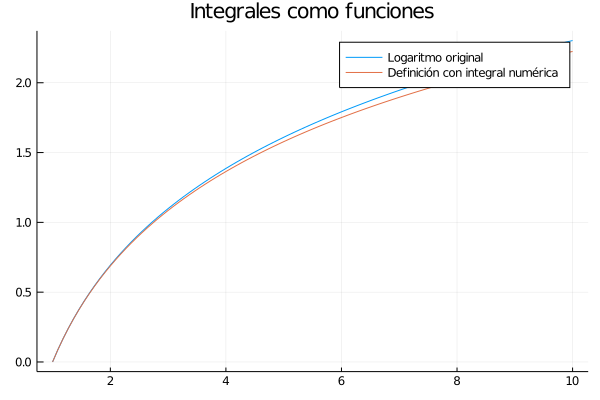

In [8]:
# dominio de la gráfica
xs = range(1,stop=10,length=100)
# subintervalos de la integral
n = 50
ys1 = [log(x) for x in xs]
ys2 = [lnIntegral(x,n) for x in xs]
plot(xs,ys1,label="Logaritmo original",title="Integrales como funciones")
plot!(xs,ys2,label="Definición con integral numérica")

## Ejercicio 2
La función $\text{erf}(x)$ se define de la siguiente forma
    \begin{equation}
        \text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
    \end{equation}
 Define una función `miErf(x,n)` que regresa el valor la función $\text{erf}(x)$ al calcular la integral utilizando la regla de integración rectangular hacia adelante con $n$ subintervalos.

## Otras opciones para definir integrales mediante sumas de Riemman:

### Segunda opción: $\xi_i = x_{i-1}$ (Integral rectangular hacia atras)


$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_{i-1})
$$

## Ejercicio 3

Implementa una función `intAtrás(f,a,b,n)` regrese el valor la integral $\int_a^b f(s) \; ds$ calculado utilizando la fórmula de la integral rectangular hacia atrás con $n$ subintervalos. Prueba tu función integrando la función  `prueba`.

### Tercera opción: tomar el punto medio $\xi_i = \frac{x_{i-1} + x_{i}}{2}$ (Integral rectangular Centrada o regla rectangular)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f\left( \frac{x_{i-1} + x_{i}}{2} \right) 
$$

## Ejercicio 4

Implementa una función `intCentrada(f,a,b,n)` regrese el valor la integral $\int_a^b f(s) \; ds$ calculado utilizando la fórmula de la regla centrada con $n$ subintervalos. Prueba tu función integrando la función  `prueba`.

## Ejercicio 5 

Repite el ejercicio 1 pero ahora utilizando las reglas de integración del ejercicio 3 y 4. ¿la tasa de convergencia mejora con las nuevas reglas?

## Ejercicio 6

Repite el ejercicio 2 pero ahora utilizando las reglas de integración del ejercicio 3 y 4.

## Aproximación más compleja: regla trapezoidal

Notemos que todas las aproximaciones rectangulares de la integral, por su construcción a partir de sumas de Riemann, aproximaban a la función $f(x)$ en cada intervalo $[x_i,x_{i+1}]$ como una función constante, es decir, un **polinomio de grado 0**. 

Una aproximación más compleja para la función en dicho intervalo sería aproximar a la función no como una constante si no como una recta (o un **polinomio de grado 1**) que pasa por los puntos $(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$. Así, el area de la integral se aproxima como la siguiente figura

![trapecio](https://lh3.googleusercontent.com/4fHTGTZ75EhLjV-Q40IbPn19RltRw41brDPh5hKa--Zq6tNj7eHtr5KS6u9rld0BbM80nVamEAfPEhnBTnC9bfL8ON7gVXfHOHLMC4crhZKTwsqAcFj4qv4QVvpw_bAY78Ak0AAslw=w400)

## Ejercicio 7

Deduce la fórmula para el valor de $\int_{x_{i}}^{x_{i+1}} f(s) \; ds$ cuando aproximamos la función como una recta. Es decir, da la fórmula para el área del trapecio en un intervalo $[x_i,x_{i+1}]$ de la figura anterior. La fórmula solo debe depender de $x_i,f(x_i), x_{i+1},f(x_{i+1})$ y $y$

**Sugerencia:** Las áreas siempre son valores positivos, por lo que debes de tratar por separado los casos $f(x_{i}) \geq f(x_{i+1})$ y   $f(x_{i}) \leq f(x_{i+1})$. 

Aunque trates ambos casos por separado, la fórmula obtenida **debe de ser la misma para ambos**.

### Planteamiento de la regla

Podemos explotar el ejercicio para crear una nueva regla de integración. Recordando que, dada una partición regular de orden $n$, se cumple que 

$$
\int_{a}^b f(s) \; ds = \sum_{i=0}^{n-1} \int_{x_{i}}^{x_{i+1}} f(s) \; ds
$$

Podemos entonces utilizar la fórmula de $\int_{x_{i}}^{x_{i+1}} f(s) \; ds$ que encontramos en el ejercicio anterior para calcular la integral en todo el intervalo $[a,b]$. A este método de cálculo de la integral se le llama la **regla trapezoidal**

## Ejercicio 8

Escribe una función `intTrapezoidal(f,a,b,n)` que regresa el valor de la integral $\int_{a}^b f(s) \; ds$ calculado utilizando la regla trapezoidal. Es decir, que para cada integral $\int_{x{i}}^{x_{i+1}} f(s) \; ds$ se calcula como el area de un trapecio.

## Ejercicio 9

Repite el ejercicio 1 utilizando ahora la regla de integración trapezoidal. ¿Mejora la tasa de convergencia?

## Aproximación avanzada: regla de Simpson

Una regla todavía más avanzada para integrar consiste en ahora aproximar la función $f(x)$ como un **polinomio de grado 2** en un subintervalo de la partición. Sin embargo, para aproximar dicha función por un polinomio, como vimos en la clase de interpolación, necesitamos conocer tres puntos por los que pasa la función. 

Para todo lo que sigue, supondremos que el orden $n$ de la partición tomada para aproximar la integral es un número **par**. Recordando el notebook de interpolación, sabemos que el polinomio de grado 2 $P_i(x)$ que pasa por los puntos $(x_{i-1},f(x_{i-1}))$, $(x_i,f(x_i))$ y $(x_{i+1},f(x_{i+1}))$ esta dado por la ecuación

\begin{align}
P_i(x) &= f(x_{i-1}) \frac{(x-x_{i})(x-x_{i+1})}{(x_{i-1}-x_{i})(x_{i-1}-x_{i+1})} \\
 &+ f(x_{i}) \frac{(x-x_{i-1})(x-x_{i+1})}{(x_{i}-x_{i-1})(x_{i}-x_{i+1})} \\
 &+ f(x_{i+1}) \frac{(x-x_{i-1})(x-x_{i})}{(x_{i+1}-x_{i-1})(x_{i+1}-x_{i})} \\
\end{align}

Así, podemos entonces aproximar la integral en el subintervalo $[x_{i-1},x_{i+1}]$ como

$$
\int_{x_{i-1}}^{x_{i+1}} f(s) \; ds \approx \int_{x_{i-1}}^{x_{i+1}} P_i(s) \;ds
$$

### Ejercicio 10

Demuestra, realizando la integración analíticamente, que

$$
\int_{x_{i-1}}^{x_{i+1}} P_i(s) \; ds = h \left(\frac{f(x_{i-1})}{3} + \frac{4 f(x_{i})}{3} + \frac{f(x_{i+1})}{3} \right)
$$


### Planteamiento de la regla

Podemos ahora, después de demostrar la fórmula del ejercicio 9, utilizar dicha fórmula para implementar una regla de integración, notando que

$$
\int_{a}^b f(s) \; ds = \sum_{i=0}^{(n-2)/2} \int_{x_{2i}}^{x_{2i+2}} f(s) \; ds
$$


A esta regla de integración se le conoce como **regla de Simpson**

## Ejercicio 11

Implementa una función `intSimpson(f,a,b,n)` que regrese el valor de la integral $\int_{a}^b f(s) \; ds $ calculado mediante regla de Simpson.

## Ejercicio 12

Repite el ejercicio 1 ahora utilizando la regla de Simpson y compara con los otros resultados. ¿Qué tanto mejora la tasa de convergencia?

## La visión general

Integrar funciones es un problema que surge todo el tiempo a la hora de hacer cómputo científico. Muchísimos problemas se descomponen, desde el punto de vista teórico, en hacer integrales (electromagnetismo, por ejemplo). Existen, debido a eso, una infinidad de reglas y aproximaciones para hacer integrales de funciones de manera numérica. 

El mayor desafío es cuando tenemos ya no integrales en una dimensión, sino integrales en varias dimensiones (a veces más de 20). En esos casos, las aproximaciones aquí mencionadas se pueden volver inútiles.

Las reglas rectangulares no son muy usadas en aplicaciones reales pues convergen a una velocidad muy pequeña. Las regla de Simpson y la trapezoidal, por el contrario, son mucho más usadas.



Existe una manera formal de estimar el error de las reglas de integración mostradas aquí. No quise enseñárselos por que, aunque sea importante, es más largo y complicado que los errores de derivación numérica. 

Pueden consultar como calcular dichos errores en el libro de Stickler (*Basic Concepts in Computational Physics*)